In [1]:
# If you run this in Colab these are usually already available.
# Uncomment and run the pip installs if you get import errors.
# !pip install -q seaborn scikit-learn

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# plotting defaults
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12,6)


In [2]:
# Name expected by the project statement
expected_filename = "AusApparalSales4thQrt2020.csv"

# Try to load file; if not present ask user to upload (Colab)
if not os.path.exists(expected_filename):
    try:
        from google.colab import files
        print("Please upload the CSV file when the file dialog appears.")
        uploaded = files.upload()  # prompts user to upload file
        # take the first uploaded filename
        uploaded_filename = list(uploaded.keys())[0]
        filename = uploaded_filename
    except Exception as e:
        raise RuntimeError(
            "Could not find the CSV in working dir and google.colab.files isn't available. "
            "Place the CSV in the runtime working directory or run this notebook in Colab."
        )
else:
    filename = expected_filename

print("Using file:", filename)
# Read CSV (don't parse dates yet — we'll detect/massage date columns later)
df = pd.read_csv(filename, low_memory=False)
print("Loaded rows, columns:", df.shape)


Please upload the CSV file when the file dialog appears.


Saving AusApparalSales4thQrt2020.csv to AusApparalSales4thQrt2020.csv
Using file: AusApparalSales4thQrt2020.csv
Loaded rows, columns: (7560, 6)


In [3]:
# Quick head & columns
display(df.head())
print("\nColumns detected:\n", df.columns.tolist())

# helper to find likely columns by common name fragments
def find_column(df, candidates):
    for c in df.columns:
        for cand in candidates:
            if cand.lower() in c.lower():
                return c
    return None

date_col = find_column(df, ['date','orderdate','invoice','transaction','sale_date','timestamp'])
time_col = find_column(df, ['time','order_time','invoice_time','txn_time'])
sales_col = find_column(df, ['sales','sale','amount','revenue','total','price'])
units_col = find_column(df, ['unit','quantity','qty','units'])
state_col = find_column(df, ['state','region','province'])
group_col = find_column(df, ['group','demographic','segment','category','gender','age','customer_type'])

print("\nInferred columns:")
print("Date col:", date_col)
print("Time col:", time_col)
print("Sales col:", sales_col)
print("Units col:", units_col)
print("State col:", state_col)
print("Group/Demo col:", group_col)


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500



Columns detected:
 ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']

Inferred columns:
Date col: Date
Time col: Time
Sales col: Sales
Units col: Unit
State col: State
Group/Demo col: Group


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Unit'].plot(kind='hist', bins=20, title='Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unit', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Unit'].plot(kind='line', figsize=(8, 4), title='Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Group'].value_counts()
    for x_label, grp in _df_14.groupby('Time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time')
_ = plt.ylabel('Group')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Unit', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Unit', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
# Standardize variable names in a working copy
df_work = df.copy()

# If any of the core columns are missing, attempt a more aggressive search
if date_col is None:
    # try to parse columns to find a parseable datetime
    for c in df_work.columns:
        try:
            test = pd.to_datetime(df_work[c], errors='coerce')
            if test.notna().sum() > len(df_work) * 0.2:  # plausible date column
                date_col = c
                print("Auto-detected date-like column:", c)
                break
        except Exception:
            pass

# parse date
if date_col is not None:
    df_work[date_col] = pd.to_datetime(df_work[date_col], errors='coerce')
else:
    print("WARNING: No date column detected; many time-based analyses will be skipped.")

# combine date + time if time exists
if time_col is not None and date_col is not None:
    # Combine safely
    df_work['datetime'] = pd.to_datetime(
        df_work[date_col].dt.strftime("%Y-%m-%d") + " " + df_work[time_col].astype(str),
        errors='coerce'
    )
elif date_col is not None:
    df_work['datetime'] = df_work[date_col]
else:
    # try to coerce any column into datetime as last resort
    for c in df_work.columns:
        try:
            temp = pd.to_datetime(df_work[c], errors='coerce')
            if temp.notna().any():
                df_work['datetime'] = temp
                print("Using", c, "as datetime.")
                break
        except Exception:
            pass

# Ensure numeric types for sales/units if present
if sales_col:
    df_work[sales_col] = pd.to_numeric(df_work[sales_col], errors='coerce')
if units_col:
    df_work[units_col] = pd.to_numeric(df_work[units_col], errors='coerce')

# Provide a small sanity head
display(df_work.head())
print("\nDatetime null count:", df_work['datetime'].isna().sum() if 'datetime' in df_work else "no datetime")


/tmp/ipython-input-2734111450.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_work['datetime'] = pd.to_datetime(


,Date,Time,State,Group,Unit,Sales,datetime
0,2020-10-01,Morning,WA,Kids,8,20000,NaT
1,2020-10-01,Morning,WA,Men,8,20000,NaT
2,2020-10-01,Morning,WA,Women,4,10000,NaT
3,2020-10-01,Morning,WA,Seniors,15,37500,NaT
4,2020-10-01,Afternoon,WA,Kids,3,7500,NaT



Datetime null count: 7560


from matplotlib import pyplot as plt
_df_19['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Unit'].plot(kind='hist', bins=20, title='Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='index', y='Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Unit', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_30['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Unit'].plot(kind='line', figsize=(8, 4), title='Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Group'].value_counts()
    for x_label, grp in _df_33.groupby('Time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time')
_ = plt.ylabel('Group')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='index', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='index', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='Unit', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='Unit', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
# show missing counts
missing = df_work.isna().sum().sort_values(ascending=False)
print("Missing value counts per column:\n", missing)

# Focus on critical columns: sales, units, state, group, datetime
critical_cols = [c for c in [sales_col, units_col, state_col, group_col, 'datetime'] if c is not None]
print("\nCritical columns considered:", critical_cols)
display(df_work[critical_cols].head())

# Recommendation (printed)
print("\nRecommendation for missing data treatment (summary):")
print("- If 'Sales' or 'Units' is missing: usually drop rows OR impute by group median if many rows missing.")
print("- If categorical (State/Group) missing: fill with 'Unknown' or infer from neighboring fields if possible.")
print("- If 'datetime' missing: those rows cannot be used for time series (drop or keep for non-time analyses).")


Missing value counts per column:
 datetime    7560
Time           0
Date           0
State          0
Group          0
Unit           0
Sales          0
dtype: int64

Critical columns considered: ['Sales', 'Unit', 'State', 'Group', 'datetime']


,Sales,Unit,State,Group,datetime
0,20000,8,WA,Kids,NaT
1,20000,8,WA,Men,NaT
2,10000,4,WA,Women,NaT
3,37500,15,WA,Seniors,NaT
4,7500,3,WA,Kids,NaT



Recommendation for missing data treatment (summary):
- If 'Sales' or 'Units' is missing: usually drop rows OR impute by group median if many rows missing.
- If categorical (State/Group) missing: fill with 'Unknown' or infer from neighboring fields if possible.
- If 'datetime' missing: those rows cannot be used for time series (drop or keep for non-time analyses).


from matplotlib import pyplot as plt
_df_38['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Unit'].plot(kind='hist', bins=20, title='Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_41.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='index', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Sales', y='Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_48['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Unit'].plot(kind='line', figsize=(8, 4), title='Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='index', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Sales', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Unit', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
# We'll implement a conservative strategy:
# 1) For Sales/Units: fill missing using group (demographic or state) median if available, else global median.
# 2) For categorical missing: fill with 'Unknown'
# 3) For datetime missing: keep rows but mark; we'll drop them only for time-series operations

df_clean = df_work.copy()

# Fill categorical missing
if state_col:
    df_clean[state_col] = df_clean[state_col].fillna("Unknown")
if group_col:
    df_clean[group_col] = df_clean[group_col].fillna("Unknown")

# Fill numeric missing using group median (use group_col first, else state_col, else overall)
def fill_numeric_by_group(col):
    if col not in df_clean.columns:
        return
    if group_col and group_col in df_clean.columns:
        med = df_clean.groupby(group_col)[col].transform('median')
        df_clean[col] = df_clean[col].fillna(med)
    if df_clean[col].isna().any() and state_col and state_col in df_clean.columns:
        med2 = df_clean.groupby(state_col)[col].transform('median')
        df_clean[col] = df_clean[col].fillna(med2)
    # final fallback
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

if sales_col:
    fill_numeric_by_group(sales_col)
if units_col:
    fill_numeric_by_group(units_col)

print("Missing after imputation:")
display(df_clean.isna().sum().sort_values(ascending=False))


Missing after imputation:


,0
datetime,7560
Time,0
Date,0
State,0
Group,0
Unit,0
Sales,0


In [7]:
# Normalize Sales and Units using Min-Max (range [0,1]).
cols_to_norm = []
if sales_col:
    cols_to_norm.append(sales_col)
if units_col:
    cols_to_norm.append(units_col)

if len(cols_to_norm) == 0:
    print("No numeric columns found to normalize.")
else:
    scaler = MinMaxScaler()
    # Need to handle possible single-column case for scaler
    arr = df_clean[cols_to_norm].fillna(0).values
    scaled = scaler.fit_transform(arr)
    for i, c in enumerate(cols_to_norm):
        df_clean[c + "_norm"] = scaled[:, i]

    print("Sample of normalized columns:")
    display(df_clean[cols_to_norm + [c + "_norm" for c in cols_to_norm]].head())


Sample of normalized columns:


,Sales,Unit,Sales_norm,Unit_norm
0,20000,8,0.095238,0.095238
1,20000,8,0.095238,0.095238
2,10000,4,0.031746,0.031746
3,37500,15,0.206349,0.206349
4,7500,3,0.015873,0.015873


from matplotlib import pyplot as plt
_df_54['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Unit'].plot(kind='hist', bins=20, title='Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['Sales_norm'].plot(kind='hist', bins=20, title='Sales_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='index', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='Sales', y='Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='Unit', y='Sales_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='Sales_norm', y='Unit_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales_norm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_64.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales_norm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Unit_norm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_65.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Unit_norm')

from matplotlib import pyplot as plt
_df_66['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Unit'].plot(kind='line', figsize=(8, 4), title='Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Sales_norm'].plot(kind='line', figsize=(8, 4), title='Sales_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
print("# GroupBy examples and recommendation")

# Example: State-level total sales
if state_col and sales_col:
    state_sales = df_clean.groupby(state_col)[sales_col].sum().sort_values(ascending=False)
    print("Top states by Sales (descending):")
    display(state_sales.head(10))

# Example: Demographic group total sales
if group_col and sales_col:
    group_sales = df_clean.groupby(group_col)[sales_col].sum().sort_values(ascending=False)
    print("Sales by demographic group:")
    display(group_sales)

print("""
Recommendation:
- Use groupby for chunking/aggregation (e.g., df.groupby('State').agg({'Sales':'sum'})) when you want summary metrics.
- Use merge/join when combining dataframes (e.g., mapping state metadata).
- For large datasets, consider chunked processing and then concatenation/aggregation to avoid memory spikes.
""")


# GroupBy examples and recommendation
Top states by Sales (descending):


,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


Sales by demographic group:


,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500



Recommendation:
- Use groupby for chunking/aggregation (e.g., df.groupby('State').agg({'Sales':'sum'})) when you want summary metrics.
- Use merge/join when combining dataframes (e.g., mapping state metadata).
- For large datasets, consider chunked processing and then concatenation/aggregation to avoid memory spikes.



In [9]:
# Overall descriptive stats
def descriptive_stats(series):
    res = {
        "count": series.count(),
        "mean": series.mean(),
        "median": series.median(),
        "mode": series.mode().iloc[0] if not series.mode().empty else np.nan,
        "std": series.std(),
        "min": series.min(),
        "max": series.max()
    }
    return pd.Series(res)

if sales_col:
    print("# Descriptive stats for Sales:")
    display(descriptive_stats(df_clean[sales_col]))
if units_col:
    print("# Descriptive stats for Units:")
    display(descriptive_stats(df_clean[units_col]))

# Group-wise statistics (e.g., per demographic group)
if group_col:
    print("\n# Group-wise descriptive stats (Sales) by", group_col)
    display(df_clean.groupby(group_col)[sales_col].agg(['count','mean','median','std','sum']).sort_values('sum', ascending=False))


# Descriptive stats for Sales:


,0
count,7560.000000
mean,45013.558201
median,35000.000000
mode,22500.000000
std,32253.506944
min,5000.000000
max,162500.000000


# Descriptive stats for Units:


,0
count,7560.000000
mean,18.005423
median,14.000000
mode,9.000000
std,12.901403
min,2.000000
max,65.000000



# Group-wise descriptive stats (Sales) by Group


,count,mean,median,std,sum
Group,,,,,
Men,1890,45370.370370,35000.0,32177.180712,85750000
Women,1890,45207.671958,35000.0,32781.639869,85442500
Kids,1890,45011.904762,35000.0,31871.491085,85072500
Seniors,1890,44464.285714,35000.0,32195.360017,84037500


from matplotlib import pyplot as plt
_df_70['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_73.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_75.plot(kind='scatter', x='std', y='sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_76.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_77.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_78.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'count'}, axis=1)
              .sort_values('count', ascending=True))
  xs = counted['count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_79.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Group')):
  _plot_series(series, series_name, i)
  fig.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_80['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_81['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_82['sum'].plot(kind='line', figsize=(8, 4), title='sum')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_83['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_83, x='mean', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_84['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_84, x='std', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_85['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_85, x='sum', y='Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
# Highest and lowest by group
if group_col and sales_col:
    grp = df_clean.groupby(group_col)[sales_col].sum().sort_values(ascending=False)
    print("Demographic group with highest sales:", grp.index[0], "Sales:", grp.iloc[0])
    print("Demographic group with lowest sales:", grp.index[-1], "Sales:", grp.iloc[-1])
    display(grp)

# Highest and lowest by state
if state_col and sales_col:
    st = df_clean.groupby(state_col)[sales_col].sum().sort_values(ascending=False)
    print("State with highest sales:", st.index[0], "Sales:", st.iloc[0])
    print("State with lowest sales:", st.index[-1], "Sales:", st.iloc[-1])
    display(st)


Demographic group with highest sales:  Men Sales: 85750000
Demographic group with lowest sales:  Seniors Sales: 84037500


,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


State with highest sales:  VIC Sales: 105565000
State with lowest sales:  WA Sales: 22152500


,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


In [11]:
# For time-based aggregation, ensure datetime index exists
if 'datetime' in df_clean.columns:
    ts_df = df_clean.copy()
    # keep a copy without missing datetimes for resampling
    ts_df = ts_df[ts_df['datetime'].notna()].set_index('datetime').sort_index()
    print("Time series rows:", ts_df.shape[0])

    # Resample sums for Sales and Units
    reports = {}
    if sales_col:
        reports['weekly_sales'] = ts_df[sales_col].resample('W').sum()
        reports['monthly_sales'] = ts_df[sales_col].resample('M').sum()
        reports['quarterly_sales'] = ts_df[sales_col].resample('Q').sum()
    if units_col:
        reports['weekly_units'] = ts_df[units_col].resample('W').sum()
        reports['monthly_units'] = ts_df[units_col].resample('M').sum()
        reports['quarterly_units'] = ts_df[units_col].resample('Q').sum()

    # show examples and save to CSV in runtime
    for k,v in reports.items():
        print("\nReport:", k)
        display(v.head())
        # save csv
        v.to_csv(f"{k}.csv")
        print("Saved to", f"{k}.csv")
else:
    print("No usable datetime column — time series reports skipped.")


Time series rows: 0

Report: weekly_sales


/tmp/ipython-input-1996419547.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reports['monthly_sales'] = ts_df[sales_col].resample('M').sum()
/tmp/ipython-input-1996419547.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  reports['quarterly_sales'] = ts_df[sales_col].resample('Q').sum()
/tmp/ipython-input-1996419547.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reports['monthly_units'] = ts_df[units_col].resample('M').sum()
/tmp/ipython-input-1996419547.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  reports['quarterly_units'] = ts_df[units_col].resample('Q').sum()


,Sales
datetime,


Saved to weekly_sales.csv

Report: monthly_sales


,Sales
datetime,


Saved to monthly_sales.csv

Report: quarterly_sales


,Sales
datetime,


Saved to quarterly_sales.csv

Report: weekly_units


,Unit
datetime,


Saved to weekly_units.csv

Report: monthly_units


,Unit
datetime,


Saved to monthly_units.csv

Report: quarterly_units


,Unit
datetime,


Saved to quarterly_units.csv


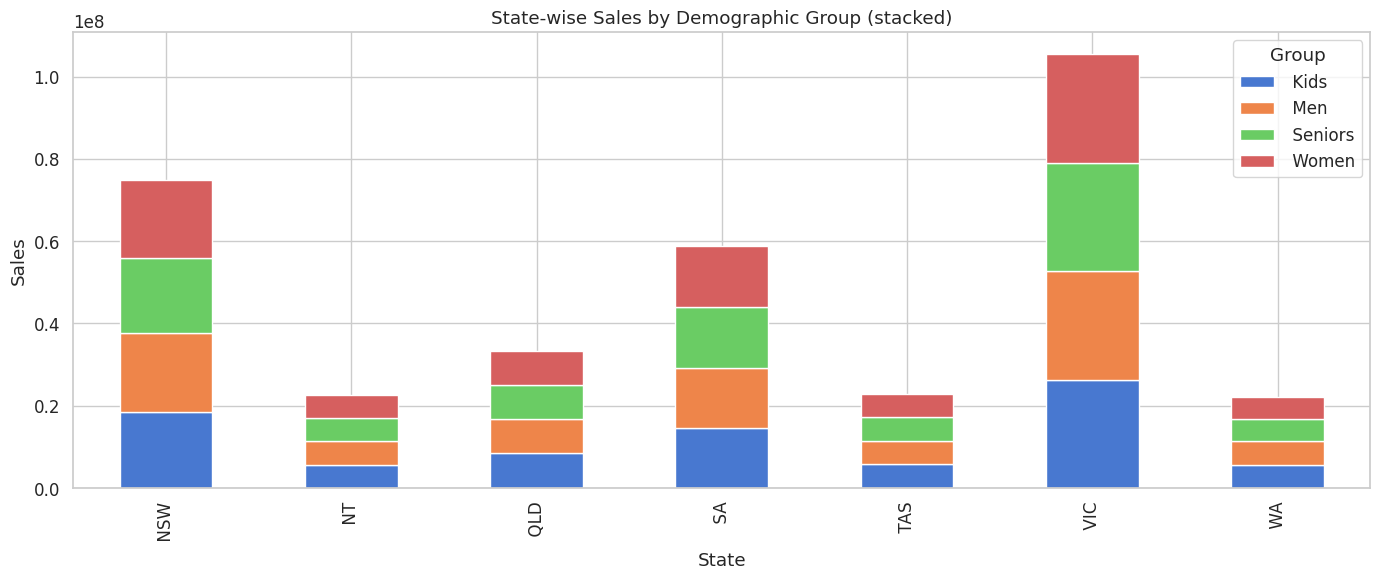

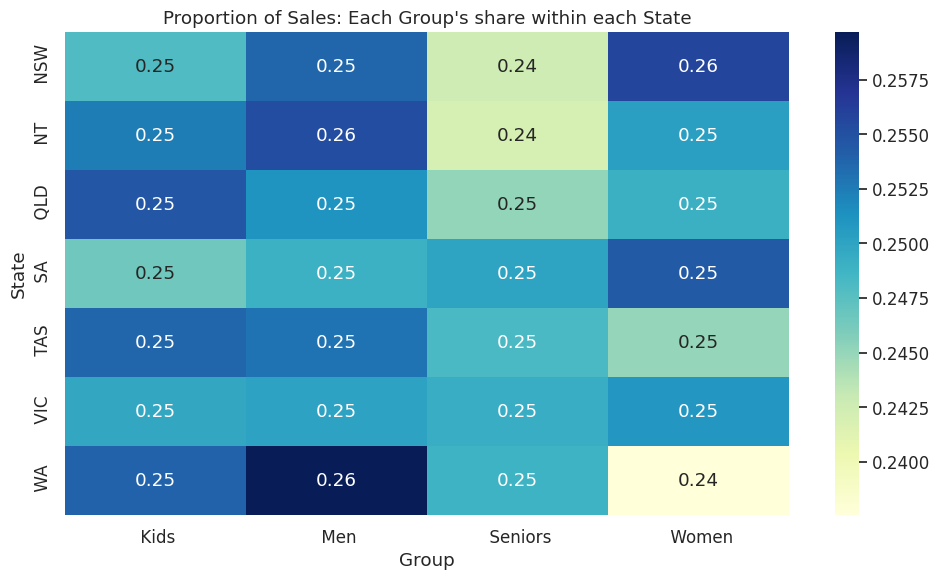

/tmp/ipython-input-2940303677.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grp_state, x=state_col, y=sales_col, hue=group_col, ci=None)


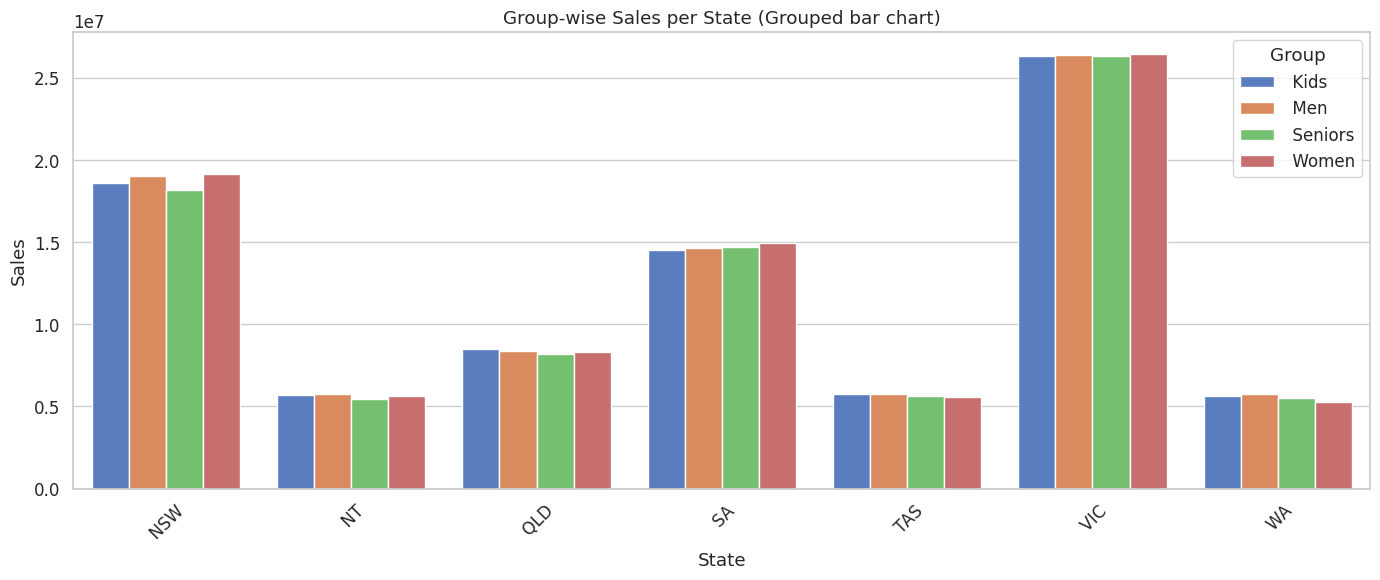

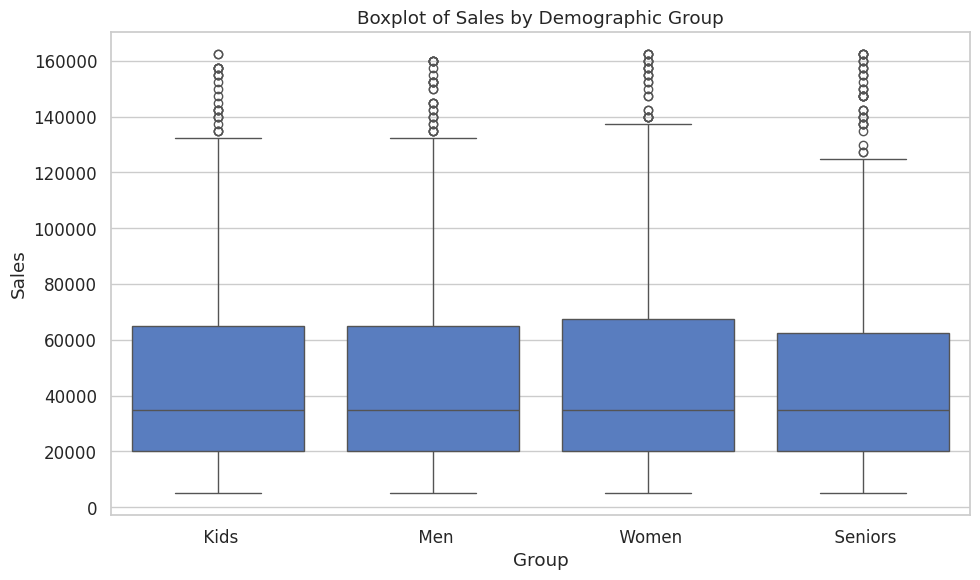

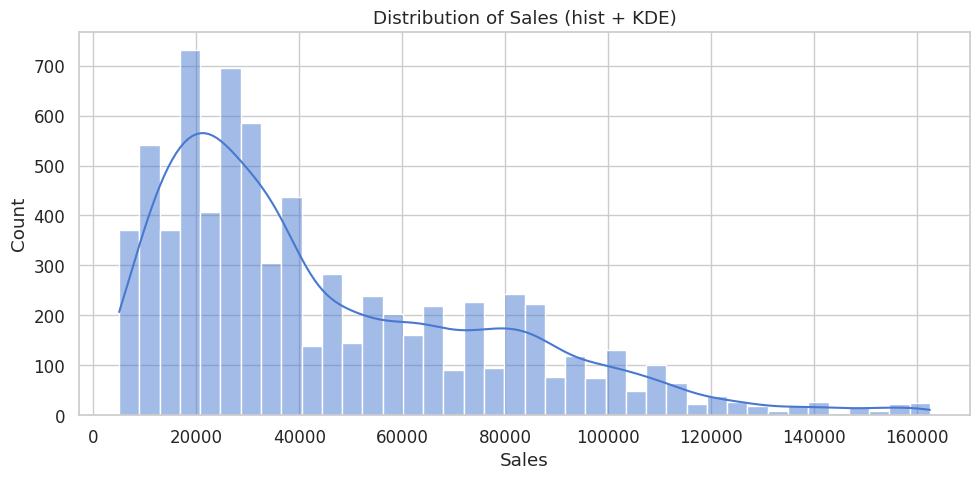

In [12]:
# 1) State-wise sales analysis for different demographic groups (stacked bars and heatmap)
if state_col and group_col and sales_col:
    pivot = df_clean.groupby([state_col, group_col])[sales_col].sum().unstack(fill_value=0)
    # stacked bar (pandas/matplotlib)
    fig, ax = plt.subplots(figsize=(14,6))
    pivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title("State-wise Sales by Demographic Group (stacked)")
    ax.set_ylabel("Sales")
    ax.set_xlabel("State")
    plt.tight_layout()
    plt.show()

    # heatmap (normalized)
    pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)  # percent contribution by group within state
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(pivot_norm, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
    ax.set_title("Proportion of Sales: Each Group's share within each State")
    plt.tight_layout()
    plt.show()
else:
    print("State/Group/Sales columns required for these plots.")

# 2) Group-wise sales distribution across states (barplot)
if group_col and sales_col:
    grp_state = df_clean.groupby([group_col, state_col])[sales_col].sum().reset_index()
    plt.figure(figsize=(14,6))
    sns.barplot(data=grp_state, x=state_col, y=sales_col, hue=group_col, ci=None)
    plt.title("Group-wise Sales per State (Grouped bar chart)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3) Box plot for descriptive statistics (Sales by Group)
if group_col and sales_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=group_col, y=sales_col, data=df_clean)
    plt.title("Boxplot of Sales by Demographic Group")
    plt.tight_layout()
    plt.show()

# 4) Distribution plot of Sales (Seaborn)
if sales_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df_clean[sales_col].dropna(), kde=True, bins=40)
    plt.title("Distribution of Sales (hist + KDE)")
    plt.xlabel("Sales")
    plt.tight_layout()
    plt.show()


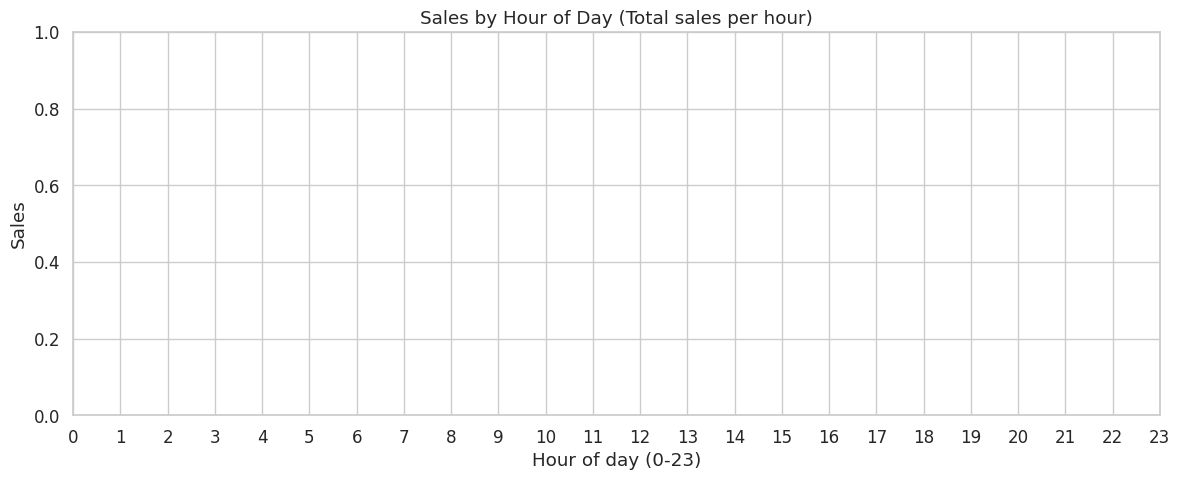

Peak hours (9-18) sales: 0.00
Off-peak sales: 0.00


In [13]:
if 'datetime' in df_clean.columns and sales_col:
    # Ensure datetime is set as series (we might have index earlier)
    tmp = df_clean[df_clean['datetime'].notna()].copy()
    tmp['hour'] = tmp['datetime'].dt.hour

    # Sum sales by hour
    hourly = tmp.groupby('hour')[sales_col].sum()
    plt.figure(figsize=(12,5))
    sns.lineplot(x=hourly.index, y=hourly.values, marker='o')
    plt.title("Sales by Hour of Day (Total sales per hour)")
    plt.xlabel("Hour of day (0-23)")
    plt.ylabel("Sales")
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Define peak hours (example: 9am-7pm) — can be adjusted
    peak_hours = list(range(9,19))
    peak_sales = hourly.loc[hourly.index.isin(peak_hours)].sum()
    offpeak_sales = hourly.sum() - peak_sales
    print(f"Peak hours ({peak_hours[0]}-{peak_hours[-1]}) sales: {peak_sales:.2f}")
    print(f"Off-peak sales: {offpeak_sales:.2f}")
else:
    print("Datetime and Sales needed for hour-of-day analysis.")


/tmp/ipython-input-4211836798.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts_df[sales_col].resample('M').sum()
/tmp/ipython-input-4211836798.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = ts_df[sales_col].resample('Q').sum()


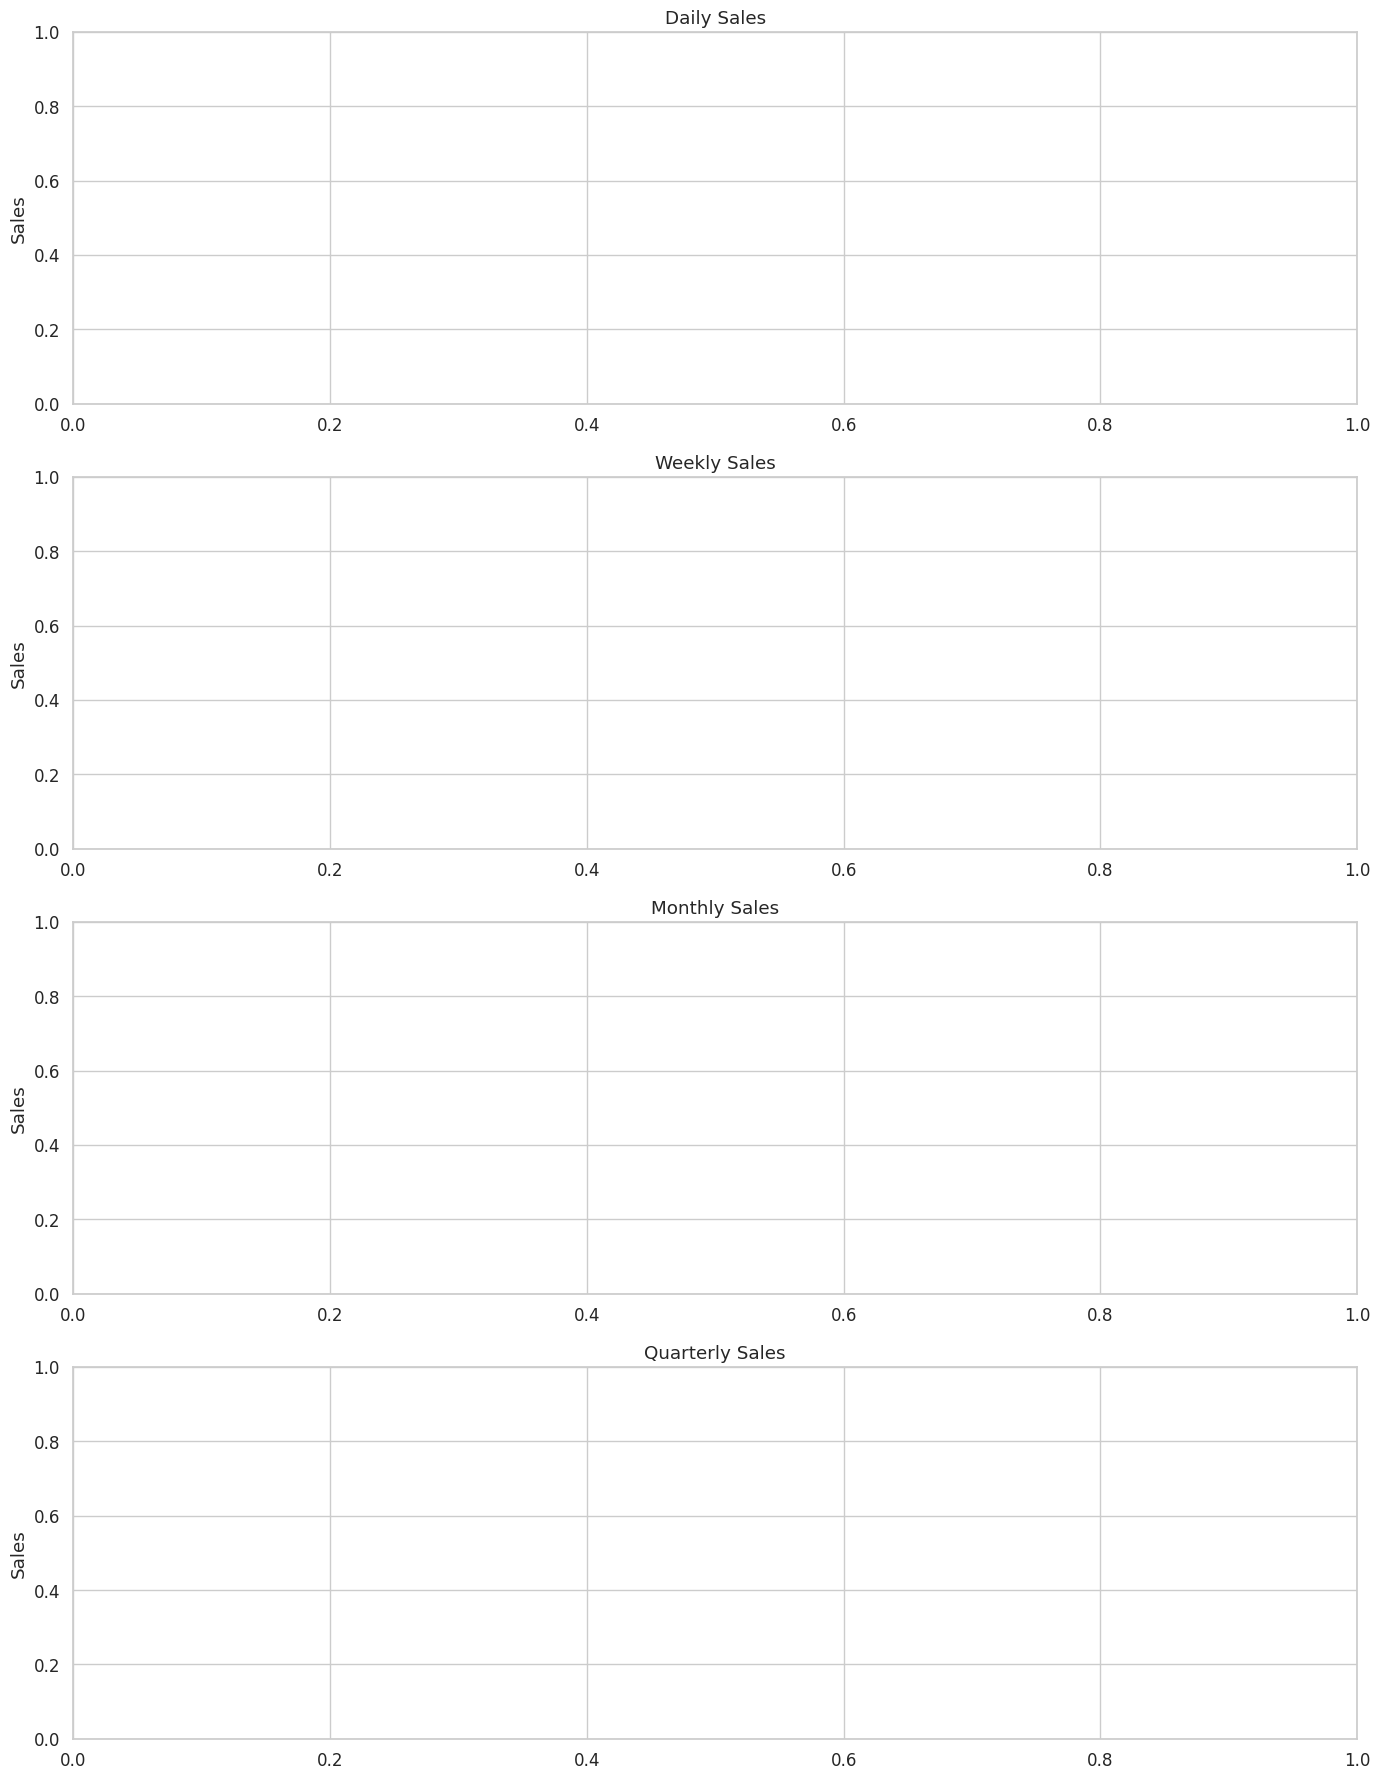

In [14]:
if 'datetime' in df_clean.columns and sales_col:
    ts_df = df_clean[df_clean['datetime'].notna()].set_index('datetime').sort_index()
    daily = ts_df[sales_col].resample('D').sum()
    weekly = ts_df[sales_col].resample('W').sum()
    monthly = ts_df[sales_col].resample('M').sum()
    quarterly = ts_df[sales_col].resample('Q').sum()

    fig, axs = plt.subplots(4,1, figsize=(14,18), sharex=False)
    sns.lineplot(x=daily.index, y=daily.values, ax=axs[0]); axs[0].set_title("Daily Sales")
    sns.lineplot(x=weekly.index, y=weekly.values, ax=axs[1]); axs[1].set_title("Weekly Sales")
    sns.lineplot(x=monthly.index, y=monthly.values, ax=axs[2]); axs[2].set_title("Monthly Sales")
    sns.lineplot(x=quarterly.index, y=quarterly.values, ax=axs[3]); axs[3].set_title("Quarterly Sales")
    for ax in axs:
        ax.set_ylabel("Sales")
        ax.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Datetime + Sales required for time-series charts.")


In [15]:
# Save the cleaned and normalized dataset for reporting
outname = "AusApparel_4Q2020_cleaned_normalized.csv"
df_clean.to_csv(outname, index=False)
print("Cleaned dataset saved to:", outname)

# Also save pivot summaries (state and group)
if state_col and sales_col:
    state_sales = df_clean.groupby(state_col)[sales_col].sum().sort_values(ascending=False)
    state_sales.to_csv("state_sales_summary.csv")
    print("Saved state_sales_summary.csv")
if group_col and sales_col:
    group_sales = df_clean.groupby(group_col)[sales_col].sum().sort_values(ascending=False)
    group_sales.to_csv("group_sales_summary.csv")
    print("Saved group_sales_summary.csv")


Cleaned dataset saved to: AusApparel_4Q2020_cleaned_normalized.csv
Saved state_sales_summary.csv
Saved group_sales_summary.csv
